In [59]:
# Load all npz files, merge the three arrays. Show a histogram for each of them
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os
os.getcwd()

'/Users/benjamin/code/gnn_agglomeration/scripts'

In [86]:
file = 'missing_edges_pos_1500_750.npz'
ndarray = np.load(file)
m = ndarray['missing_edges_pos']

In [87]:
lengths = np.linalg.norm(m[:,0,:] - m[:,1,:], axis=1)

In [88]:
min(lengths)

5.477225575051661

<IPython.core.display.Javascript object>


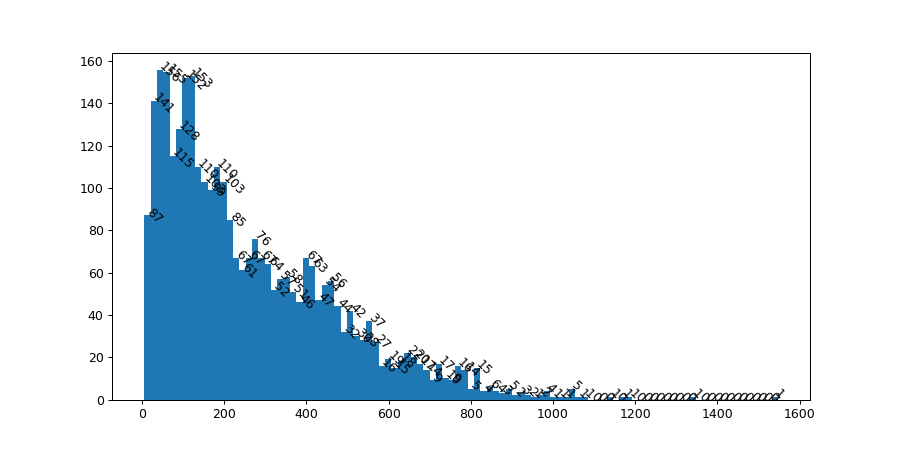

In [89]:
num_bins = 100
plt.figure(figsize=(10,5))
arr = plt.hist(lengths, bins=num_bins, log=False);
for i in range(num_bins):
    plt.text(arr[1][i],arr[0][i],int(arr[0][i]), rotation=-45)

In [64]:
np.quantile(lengths, 0.95)

684.7815701317754

<IPython.core.display.Javascript object>


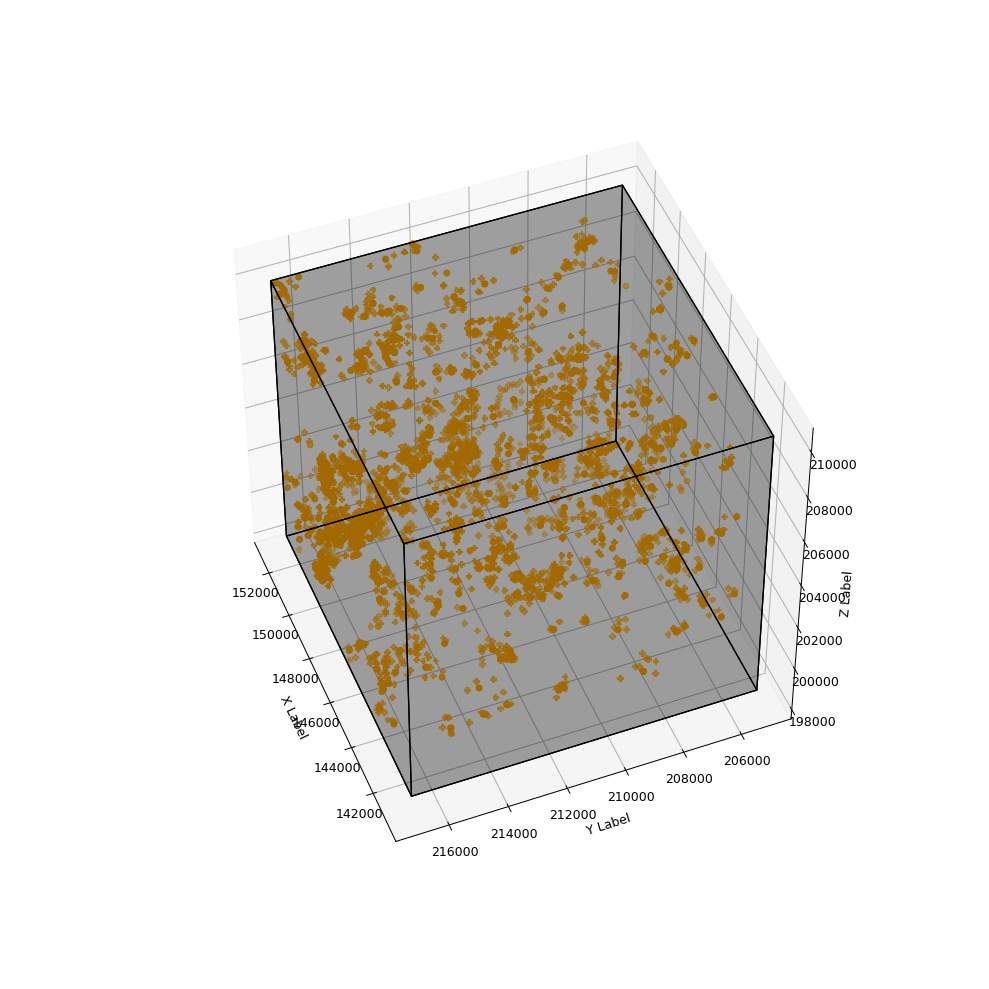

In [84]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib notebook
import numpy as np

fig = plt.figure(figsize=(11,11))
ax = fig.add_subplot(111, projection='3d')
# ax = fig.gca(projection='3d')
# ax.set_aspect("equal")

# for c, m, zlow, zhigh in [('r', 'o', -50, -25), ('b', '^', -30, -5)]: 
ax.scatter(m[:,0,0], m[:,0,1], m[:,0,2], c='orange', marker='o')
ax.scatter(m[:,1,0], m[:,1,1], m[:,1,2], c='orange', marker='P')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.show()

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection, Line3DCollection

def plot_cube(cube_definition):
    cube_definition_array = [
        np.array(list(item))
        for item in cube_definition
    ]

    points = []
    points += cube_definition_array
    vectors = [
        cube_definition_array[1] - cube_definition_array[0],
        cube_definition_array[2] - cube_definition_array[0],
        cube_definition_array[3] - cube_definition_array[0]
    ]

    points += [cube_definition_array[0] + vectors[0] + vectors[1]]
    points += [cube_definition_array[0] + vectors[0] + vectors[2]]
    points += [cube_definition_array[0] + vectors[1] + vectors[2]]
    points += [cube_definition_array[0] + vectors[0] + vectors[1] + vectors[2]]

    points = np.array(points)

    edges = [
        [points[0], points[3], points[5], points[1]],
        [points[1], points[5], points[7], points[4]],
        [points[4], points[2], points[6], points[7]],
        [points[2], points[6], points[3], points[0]],
        [points[0], points[2], points[4], points[1]],
        [points[3], points[6], points[7], points[5]]
    ]

#     fig = plt.figure()
#     ax = fig.add_subplot(111, projection='3d')

    faces = Poly3DCollection(edges, linewidths=1, edgecolors='k')
    faces.set_facecolor((0,0,0,0.2))

    ax.add_collection3d(faces)

    # Plot the points themselves to force the scaling of the axes
    ax.scatter(points[:,0], points[:,1], points[:,2], s=0)

    ax.set_aspect('equal')


cube_definition = [
    (140800, 205120, 198400), (140800 + 11800, 205120, 198400), (140800, 205120 + 11800, 198400), (140800, 205120, 198400 + 11800)
]
plot_cube(cube_definition)